In [1]:
!pip3 install scikit-learn gensim nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv('simpsons.csv')
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
158309,Miss Hoover,I'm back.
158310,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
158311,Miss Hoover,Psy-cho-so-ma-tic.
158312,Ralph Wiggum,Does that mean you were crazy?


1. preprocessing

In [3]:
df.isnull().sum()

raw_character_text 17814
spoken_words 26459
dtype: int64

In [4]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text 0
spoken_words 0
dtype: int64

In [5]:
df_clean = df.dropna().drop_duplicates()
df_clean.shape

(126646, 2)

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english'))
def preprocess(text): 
    text = text.lower() 
    text = ''.join([word for word in text if word not in string.punctuation]) 
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in stop_words] 
    return ' '.join(tokens)
datatext = df_clean["spoken_words"].apply(preprocess)
datatext

0 actually little sometimes disease magazines ne...
1 wheres mr bergstrom
2 dont know although id sure like talk didnt tou...
3 life worth living
4 polls open end recess case decided put thought...
 ... 
131848 im back
131849 see class lyme disease turned
131850 psychosomatic
131851 mean crazy
131852 means faking
Name: spoken_words, Length: 126646, dtype: object

2. word2vec(): set up the parameters of the model one-by-one

The parameters:

- min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)
- window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and 
- window words on the left of our target - (2, 10)
- vector_size = int - Dimensionality of the feature vectors. - (50, 300)
- sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
- alpha = float - The initial learning rate - (0.01, 0.05)
- min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
- negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
- workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [8]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in datatext]
w2v_model= Word2Vec(sentences, vector_size=300, window=5, min_count=5,workers=4)

3. build_vocab(): we are building vocabulary from sequence of sentences and thus initialized the model

In [9]:
w2v_model.build_vocab(sentences)

4. train()
Parameters of the training:

- total_examples = int - Count of sentences;
- epochs = int - Number of iterations (epochs) over the corpus - [10, 20, 30]

In [10]:
w2v_model.train(sentences,total_examples=w2v_model.corpus_count,epochs=30)

(18483831, 21874110)

In [11]:
w2v_model.wv.most_similar("homer")

[('marge', 0.48112964630126953),
 ('abe', 0.463473379611969),
 ('family', 0.36244404315948486),
 ('homie', 0.33362293243408203),
 ('dad', 0.32472825050354004),
 ('grampa', 0.30895039439201355),
 ('well', 0.2958821654319763),
 ('lisa', 0.29132500290870667),
 ('bart', 0.273308128118515),
 ('moe', 0.2668883502483368)]

In [12]:
w2v_model.wv.most_similar("bart")

[('lisa', 0.4369783103466034),
 ('boy', 0.3956129252910614),
 ('maggie', 0.3920854330062866),
 ('milhouse', 0.3517507016658783),
 ('dad', 0.3402898609638214),
 ('kid', 0.3268760144710541),
 ('homework', 0.3221780061721802),
 ('marge', 0.3113791048526764),
 ('daughter', 0.30678197741508484),
 ('saxophone', 0.30228739976882935)]

In [13]:
w2v_model.wv.similarity("maggie","baby")

0.3112447

In [14]:
w2v_model.wv.doesnt_match(["jimbo","milhouse","kearney"])

'milhouse'

In [15]:
w2v_model.wv.doesnt_match(["nelson","milhouse","bart"])

'bart'

In [16]:
w2v_model.wv.most_similar(positive=["homer","woman"],negative="man", topn=2)

[('abe', 0.38028067350387573), ('marge', 0.3746032118797302)]

In [17]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=13).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

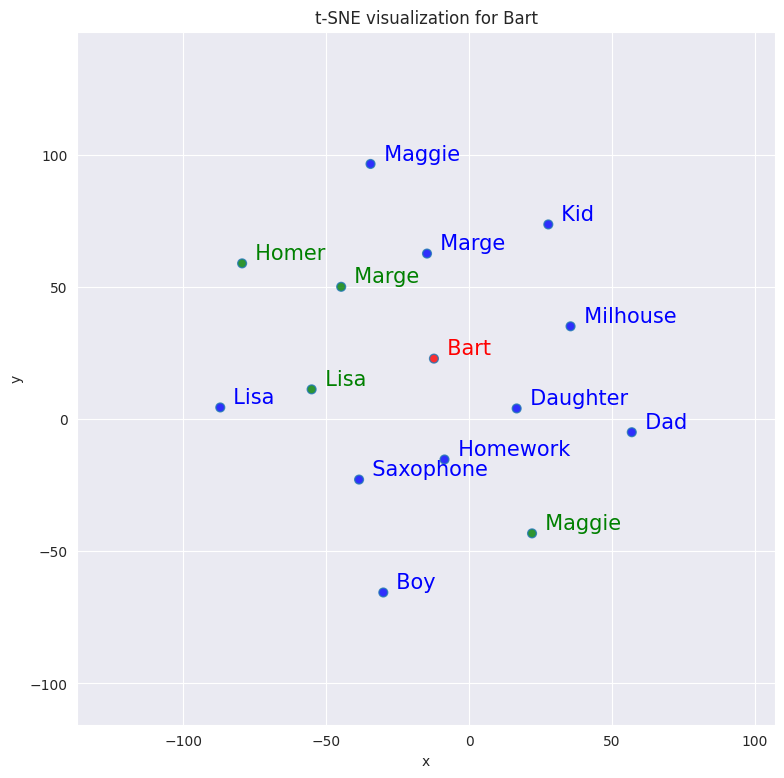

In [25]:
#this function plots 10 similar words in BLUE and 4 given words in GREEN
tsnescatterplot(w2v_model,"bart",["homer","marge","lisa","maggie"])

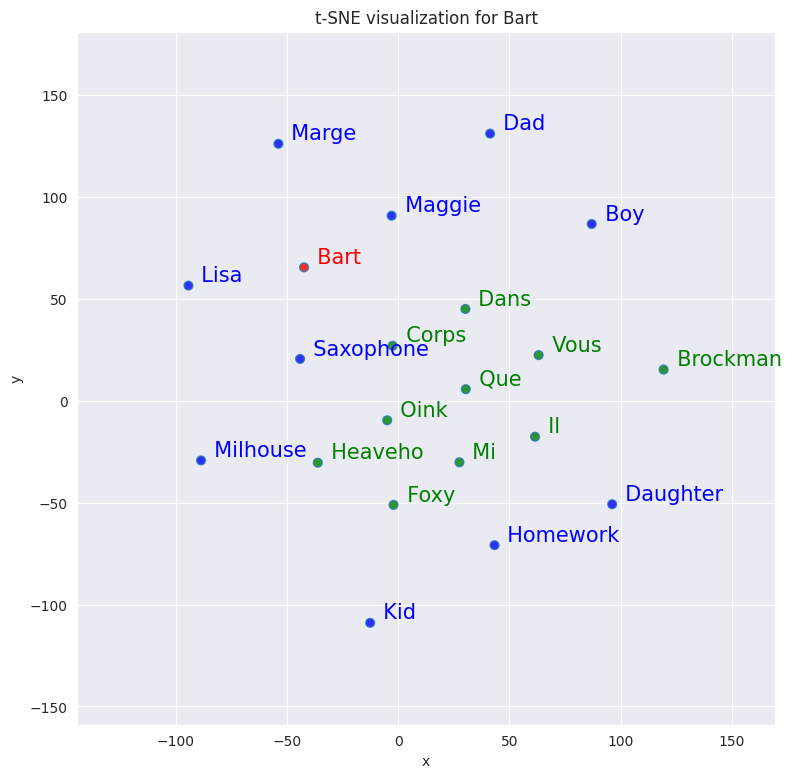

In [26]:
#10 Most similar words(blue) vs. 10 Most dissimilar(green)
tsnescatterplot(w2v_model, 'bart', [i[0] for i in w2v_model.wv.most_similar(negative=["bart"])])

In [27]:
w2v_model.wv.similarity("doctor", 'woman')-w2v_model.wv.similarity("doctor", 'man')

0.027550504